In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

### Tabulated EOS

In [16]:
filename_T2 = 'LJ_T2.dat'
filename_T09 = 'LJ_T09.txt'
data_T2 = np.loadtxt(filename_T2)
data_T09 = np.loadtxt(filename_T09)

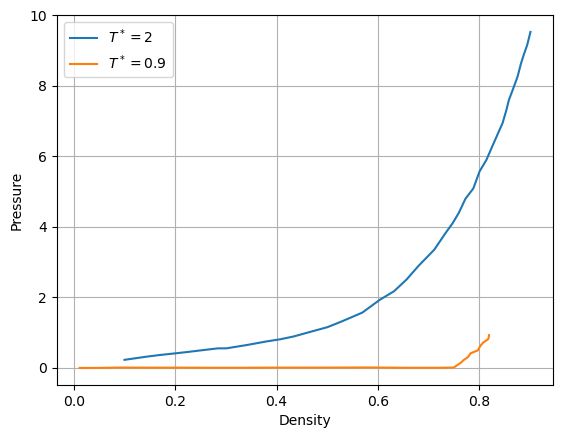

In [17]:
plt.plot(data_T2[:, 0], data_T2[:, 1], label = r'$T^* = 2$')
plt.plot(data_T09[:, 0], data_T09[:, 1], label = r'$T^* = 0.9$')
plt.xlabel('Density')
plt.ylabel('Pressure')
plt.legend()
plt.grid()

In [18]:
### Simulations analysys

In [36]:
t_eq = 5_000
thinning = 10

col = ['N', 'n', 'rho', 'T', 'P', 'energy_per_particle', 'acceptance_ratio']
df = pd.DataFrame(columns= col)

In [37]:
path = 'OLMC_code_Lennard_Jones/output/'
files = os.listdir(path)

In [38]:
for file in files:

    #extract parameters of the simulation with regex
    pattern_initialization = r'ic_(.*?)_'
    initialization = re.search(pattern_initialization, file).group(1)
    
    pattern_N = r'N_(.*?)_'
    N = int(re.search(pattern_N, file).group(1))
    
    pattern_density = r'density_(.*?)_'
    rho = float(re.search(pattern_density, file).group(1))
       
    pattern_time = r'time_(.*?)_'
    time = int(re.search(pattern_time, file).group(1))
    
    pattern_displacement = r'displacement_(.*?)_'
    d_max = float(re.search(pattern_displacement, file).group(1))
    
    pattern_realization = r'realization_(.*?).txt'
    n = int(re.search(pattern_realization, file).group(1))

    pattern_temperature = r'Temperature_(.*?)_'
    T = float(re.search(pattern_temperature, file).group(1))   
    
    # Loading data: time-series of observables
    data = np.loadtxt(path + file)
    time = data[:, 0]
    energy = data[:, 1]
    pressure = data[:, 2]
    acceptance_ratio = data[:, 3]


    #plt.figure()
    #plt.plot(time, energy/N)
    #plt.title(file)

    #extracting values
    av_en_per_particle = np.mean(energy[t_eq::thinning]) / N
    av_pressure = np.mean(pressure[t_eq::thinning])
    av_acceptance_ratio = np.mean(acceptance_ratio[t_eq::thinning])

    df.loc[len(df)] = [N, n, rho, T, av_pressure, av_en_per_particle, av_acceptance_ratio]   

In [39]:
df = df.groupby(['T', 'rho']).mean('P').reset_index()
df

T  rho      N    n         P  energy_per_particle  acceptance_ratio
0   0.9  0.1  100.0  2.0  0.033121            -0.780376          0.711893
1   0.9  0.2  100.0  2.0 -0.137832            -2.066396          0.519290
2   0.9  0.3  100.0  2.0 -0.151501            -3.153815          0.390166
3   0.9  0.4  100.0  2.0  0.003425            -3.598749          0.338275
4   0.9  0.5  100.0  2.0  0.020603            -3.830129          0.313354
5   0.9  0.6  100.0  2.0 -0.265379            -4.569766          0.251012
6   0.9  0.7  100.0  2.0 -0.814716            -5.425351          0.202678
7   0.9  0.8  100.0  2.0  0.570790            -6.102316          0.129916
8   0.9  0.9  100.0  2.0  7.523630            -5.822974          0.070908
9   2.0  0.1  100.0  2.0  0.169002            -0.593293          0.833378
10  2.0  0.2  100.0  2.0  0.203122            -1.398915          0.742308
11  2.0  0.3  100.0  2.0  0.400838            -2.126203          0.658801
12  2.0  0.4  100.0  2.0  0.910265            -2.686236          0.544558
13  2.0  0.5  100.0  2.0  1.662938            -3.229644          0.434036
14  2.0  0.6  100.0  2.0  2.874767            -3.738844          0.333728
15  2.0  0.7  100.0  2.0  3.311914            -4.574038          0.270215
16  2.0  0.8  100.0  2.0  5.387917            -5.221021          0.193676
17  2.0  0.9  100.0  2.0  9.762271            -5.475198          0.136268

In [40]:
### Plot of Equation of State

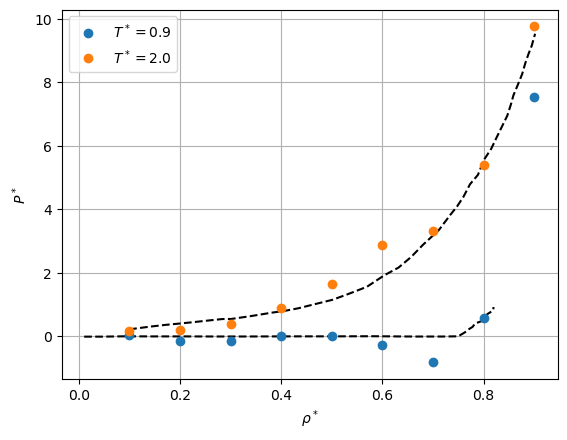

In [41]:
T_list = np.unique(df['T'])

#tabulated data
plt.plot(data_T2[:, 0], data_T2[:, 1], '--', color = 'black')
plt.plot(data_T09[:, 0], data_T09[:, 1], '--',  color = 'black')

for T in T_list:
    plt.plot(df['rho'][df['T'] == T], df['P'][df['T'] == T], 'o', label = r'$T^* = $' + str(T))

plt.xlabel(r'$\rho^*$')
plt.ylabel(r'$P^*$')

plt.legend()
plt.grid()

plt.savefig('EOS_lennard_jones.png')